# Pulse Measurements: Spectrogams, Frog & Photoelectrons

**Author: Paul Hockett, National Research Council of Canada, paul@femtolab.ca, http://femtolab.ca**

To accompany the book Quantum Metrology with Photoelectrons, for more see:
* [Book webpages on femtolab.ca](http://femtolab.ca/?tag=metrology-book "Book webpages")
* [OSF project page (accompanying materials)](https://osf.io/q2v3g/ "OSF project page")
* [On Github (accompanying codes)](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons "Book code')

v2, 13th November 2018
v1, 29th September 2018

Latest version of this notebook on Github: https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/blob/master/PulseMeasurements/PulseMeasurements_Frog.ipynb

***
A brief exploration of (basic) pulse measurements with photoelectrons: auto-correlation, cross-correlation and spectrograms.

For more detailed notes see:

[1] Tannor, D. J. (2007). Introduction to quantum mechanics : a time-dependent perspective. Univ. Science Books.

[2] Hockett, P. (2018). Quantum Metrology with Photoelectrons, Volume 1 Foundations. IOP Publishing. https://doi.org/10.1088/978-1-6817-4684-5

[3] Hockett, P., Wollenhaupt, M., Lux, C., & Baumert, T. (2015). Complete photoionization experiments via ultrafast coherent control with polarization multiplexing. II. Numerics and analysis methodologies. Physical Review A, 92(1), 013411. https://doi.org/10.1103/PhysRevA.92.013411

[4] Diels, J.-C., & Rudolph, W. (2006). Ultrashort Laser Pulse Phenomena. Academic Press.

[5] Trebino, R., DeLong, K. W., Fittinghoff, D. N., Sweetser, J. N., Krumbügel, M. A., Richman, B. A., & Kane, D. J. (1997). Measuring ultrashort laser pulses in the time-frequency domain using frequency-resolved optical gating. Review of Scientific Instruments, 68(9), 3277. https://doi.org/10.1063/1.1148286

[6] Froglib (Python), Christoph Mahnke, 2018 https://github.com/xmhk/froglib

***

# Theory

* Not quite right at the moment - FT of E-field is rather ad hoc! Needs to be reworked as a proper time-domain derivation as per Tannor.

Very generally, a dipole transition can be written as:

$d_{i\rightarrow f}(\epsilon, t)=\langle\Psi_{f}(\epsilon,t)|\hat{\mathbf{\mu}}_{fi}.\boldsymbol{\mathbf{E}}(\omega_0,t)|\Psi_{i}(\epsilon,t)\rangle$

Where $\Psi_{i, f}$ are initial and final state wavefunctions, both a function of energy $\epsilon$, and time $t$; $\hat{\mathbf{\mu}}$ is the dipole operator, and $\boldsymbol{\mathbf{E}}(\omega_0,t)$ a time-dependent electric field at carrier frequency $\omega$. [The notation here is a bit confusing, but reflects the fact that one usually ends up working with a mix of time and frequency domain quantities in the numerics - it should be cleaned up to more clearly reflect time or freq. domain definitions!]

For a pair of transitions, the effective 2-photon matrix element can then given by:

$d_{i\rightarrow f}(\epsilon,t-\tau)=\langle\Psi_{f}(\epsilon,t)|\hat{\mathbf{\mu}}_{f\nu}.\boldsymbol{\mathbf{E}_2}(\omega_2,t-\tau)|\Psi_{\nu}(\epsilon,t)\rangle \langle\Psi_{\nu}(\epsilon,t)|\hat{\mathbf{\mu}}_{\nu i}.\boldsymbol{\mathbf{E}_1}(\omega_1,t)|\Psi_{i}(\epsilon,t)\rangle$

Here $\nu$ is an intermediate state, two dipole couplings, and two $\boldsymbol{\mathbf{E}}$-fields with carrier frequencies $\omega_1$ and $\omega_2$, and a relative delay $\tau$,  are defined; the notation has been simplified, see [1], Chpt. 13, for a more detailed derivation along these lines.

Integrating over the $\boldsymbol{\mathbf{E}}$-field durations gives:

$d_{i\rightarrow f}(\epsilon,\tau) = \int d_{\nu\rightarrow f}(\epsilon,t-\tau)d_{i\rightarrow \nu}(\epsilon,t) dt$

In the following, this general result is investigated for the specific case of a two-photon, non-resonant, single-electron, ionizing transition. In this case, assuming that the intermediate state is virtual (has no intrinsic lifetime or dynamics), and that the initial and final states can be written as simple products (unpertured by the $\boldsymbol{\mathbf{E}}$-fields):

$d_{i\rightarrow f}(\epsilon,\tau) = \int \boldsymbol{\mathbf{E}_2}(\omega_2,t-\tau)\boldsymbol{\mathbf{E}_1}(\omega_1,t)d_{\nu\rightarrow f}(\epsilon_k)d_{i\rightarrow \nu}(\epsilon) dt$

Where $d(\epsilon)$ are time-independent matrix elements, which can further be decomposed into radial and angular parts (see [2], [3]), and the final state is assumed to correspond to a continuum electron of energy $\epsilon_k$. 

Finally, if the matrix elements are assumed to be constant over the bandwidth of the $\boldsymbol{\mathbf{E}}$-fields, then they can be regarded as constants and, for the purposes of pulse measurement, neglected, since they simply correspond to an overall magnitude and phase contribution.

Hence,

$d_{i\rightarrow f}(\epsilon,\tau) \propto \int \boldsymbol{\mathbf{E}_2}(\omega_2,t-\tau)\boldsymbol{\mathbf{E}_1}(\omega_1,t) dt$

And the observable, energy and time-resolved, photoelectron yield is given by:

$I(\epsilon,\tau) = |d_{i\rightarrow f}(\epsilon,\tau)|^2 \propto |\int \boldsymbol{\mathbf{E}_2}(\omega_2,t-\tau)\boldsymbol{\mathbf{E}_1}(\omega_1,t) dt|^2$

This is still in a "mixed" notation, where the $\boldsymbol{\mathbf{E}}$-fields are in the time-domain, and the dipole matrix elements defined in terms of energy points; for the fields alone the energy domain result can be defined via a Fourier Transform:

$S(\epsilon,\tau) \propto |\int \boldsymbol{\mathbf{E}_2}(\omega_2,t-\tau)\boldsymbol{\mathbf{E}_1}(\omega_1,t)e^{-i\omega t} dt|^2$

Where $S(\epsilon,\tau)$ denotes a spectrogram. This definition is, essentially, the same as optical-domain SHG-Frog [5]. 

# Definitions

## Electric fields - time-domain

Define Gaussian field in the time-domain, with amplitude $E_0$, width $\sigma$ and carrier frequency $\omega_0$:

$E(\omega_0,t)=E_{0}e^{-(t^2/2\sigma^{2})}e^{i\omega_0 t}$

Carrier frequency in rad/s:

$\omega_0 = 2\pi \Omega_0$

FWHM and Gaussian width (see https://en.wikipedia.org/wiki/Gaussian_function for full definitions):

$FWHM = 2\sigma\sqrt{2ln2}$


In [159]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as scipy_constants

For sigma=15: FWHM=35.322, spectral width (transform limit, normalised units)=0.029
For sigma=10: FWHM=23.548, spectral width (transform limit, normalised units)=0.044


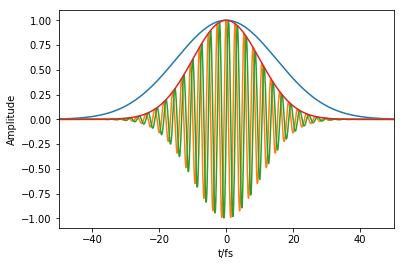

In [150]:
# Define Gaussian pulse in time domain, if carrier freq. is not defined calc. envelope only
# Sigma = Gaussian width, FWHM = 2
def Et(E0,t,sigma,w0=None):
    Efield = E0 * np.exp(-0.5*(t**2)/(sigma**2))
    
    if w0 is not None:
        Efield = Efield * np.exp(1.0j*w0*t)
        
    return Efield

# Define FWHM from sigma
def FWHM(sigma):
    width = 2*np.sqrt(2*np.log(2))*sigma
    dw = 0.44/sigma  # Spectral width for a Gaussian pulse, sigma*tUnit to give in Hz 
    print(f'For sigma={sigma}: FWHM={width:.3f}, spectral width (transform limit, normalised units)={dw:.3f}')
   
    return width

# Define working units
fUnit = 1e12  # THz
lUnit = 1e-9  # nm
tUnit = 1e-15 # fs

# Define temporal axis
dt = 0.1  # Step size for t axis.
t = np.arange(-150,150,dt)

# Gaussian field examples
sig1 = 15
FWHM(sig1)
E1 = Et(1,t,sig1)  # Envelope only, real

sig2 = 10
FWHM(sig2)
f0 = 375*fUnit*tUnit  # Carrier freq. in relative units, 375THz = 800nm
E2 = Et(1,t,sig2,w0=f0*2*np.pi)  # Full field, imaginary, w0 defined as angular freq.

plt.plot(t,E1)
plt.plot(t,E2.real,t,E2.imag,t,np.abs(E2))
plt.xlabel('t/fs')
plt.ylabel('Amplitude')
plt.xlim((-50,50))
plt.show()

## Electric fields - frequency domain

Define as the FT of the time-domain fields (following the notation of [4]):

$\tilde{E}(\Omega)=\mathcal{F}\{E(t)\}$

Spectral width for a transform-limited Gaussian (see also [4]), where [0.44 is the time-bandwidth product](https://www.rp-photonics.com/gaussian_pulses.html):

$\Delta \Omega = 0.44/\sigma$

[Bandwidth in wavelength](https://www.rp-photonics.com/bandwidth.html) (for a given carrier frequency/central wavelength):

$\Delta \lambda = \lambda^2 \Delta \Omega /c$

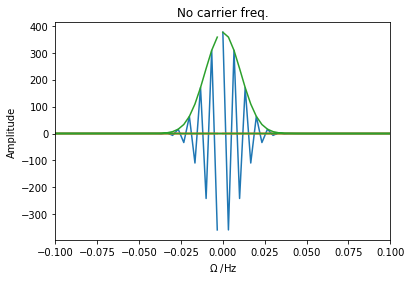

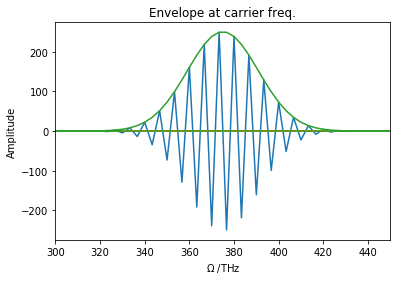

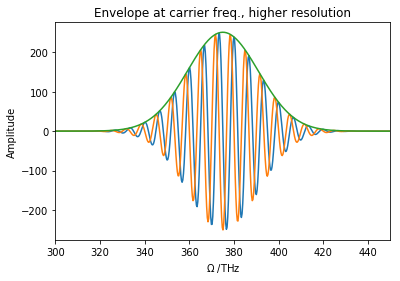

In [151]:
# Define spectral domain pulse as FFT(E(t)). Return normalised freq. axis if t and dt are defined.
# See https://docs.scipy.org/doc/numpy/reference/routines.fft.html#module-numpy.fft for FFT notes.
# For higher-resolution results, add zero-padding

# Define spectral domain pulse as FFT(E(t)). Return normalised freq. axis if t and dt are defined.
def Ew(Et, t=None, dt=None, pad=False):

    Ew = np.fft.fft(Et)

    if t is not None:
        f = np.fft.fftfreq(t.shape[-1],d=dt)
    else:
        f = None

    # Use zero-padding for higher resolution FFT result
    if pad is True:
        n = 2**(np.ceil(np.log2(Et.shape[0]))+3)  
        Ew = np.fft.fft(Et,n=np.int(n)) 

        # New sampling axis
        f = np.fft.fftfreq(np.int(n),d=dt)

    return Ew, f


# FT with unit Hz
E1w, f = Ew(E1,t=t*tUnit,dt=dt)

plt.figure
plt.plot(f,E1w.real,f,E1w.imag, f, np.abs(E1w))
plt.xlim((-dt,dt))
plt.xlabel('$\Omega$ /Hz')
plt.ylabel('Amplitude')
plt.title('No carrier freq.')
plt.show()

# FT with unit THz
E2w, f = Ew(E2,t=t*tUnit,dt=dt*tUnit)

plt.figure
plt.plot(f/fUnit,E2w.real,f/fUnit,E2w.imag, f/fUnit, np.abs(E2w))
plt.xlim((0.8*(f0/tUnit)/fUnit,1.2*(f0/tUnit)/fUnit))
plt.xlabel('$\Omega$ /THz')
plt.ylabel('Amplitude')
plt.title('Envelope at carrier freq.')
plt.show()

# FT with unit Hz, plus zero padding & +ve half of spectrum only
E3w, f3 = Ew(E2,t=t*tUnit,dt=dt*tUnit, pad=True)
# +ve half
E3w = E3w[0:np.int(E3w.shape[0]/2)]
f3 = f3[0:E3w.shape[0]]

plt.figure
plt.plot(f3/fUnit,E3w.real,f3/fUnit,E3w.imag, f3/fUnit, np.abs(E3w))
plt.xlim((0.8*(f0/tUnit)/fUnit,1.2*(f0/tUnit)/fUnit))
plt.xlabel('$\Omega$ /THz')
plt.ylabel('Amplitude')
plt.title('Envelope at carrier freq., higher resolution')
plt.show()

## Spectral phase & effect in time-domain

Pulse in magnitude, phase form:

$\tilde{E'}(\Omega)=\tilde{E}(\Omega)e^{i\phi(\Omega)}$

Modify phase... e.g., add quadratic term (linear chirp)

$\phi(\Omega)=(\Omega-\Omega_0)^2$

Transform back to time-domain:

$E'(t)=\mathcal{F}^{-1}\{\tilde{E'}(\Omega)\}$

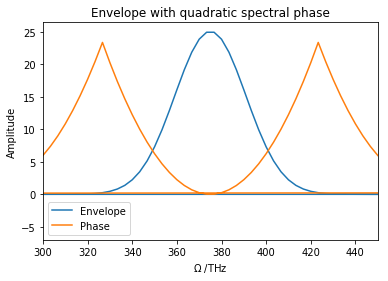

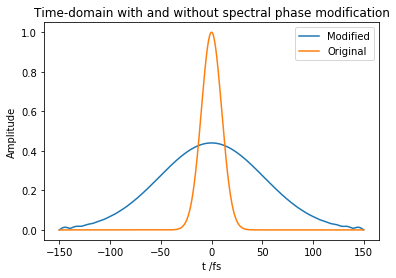

In [152]:
# Redefine pulse - remove linear phase term
E2w = np.abs(E2w)

# Set quadratic phase (corresponds to linear chirp), phi=A*f^2
A = 0.1/fUnit
Ewq = np.abs(E2w)*np.exp(1.0j*(A*(f-(f0/tUnit)))**2)

# Transform back to time-domain
E2tmod = np.fft.ifftshift(np.fft.ifft(Ewq))

plt.figure
plt.plot(f/fUnit,np.abs(Ewq)/10,f/fUnit, np.unwrap(np.angle(Ewq)))
plt.xlim((0.8*(f0/tUnit)/fUnit,1.2*(f0/tUnit)/fUnit))
plt.xlabel('$\Omega$ /THz')
plt.ylabel('Amplitude')
plt.title('Envelope with quadratic spectral phase')
plt.legend(('Envelope','Phase'))
plt.show()

plt.figure()
plt.plot(t,np.abs(E2tmod),t,np.abs(E2))
plt.xlabel('t /fs')
plt.ylabel('Amplitude')
plt.title('Time-domain with and without spectral phase modification')
plt.legend(('Modified','Original'))

plt.show()

## Spectrograms

Define as per (optical) Frog traces [5]; code based on Froglib [6], see https://github.com/xmhk/froglib.

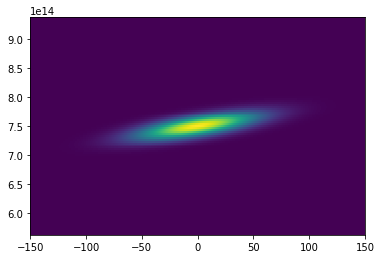

In [153]:
# Frog spectrograms - code adapted from Froglib, https://github.com/xmhk/froglib 
def frog(signal, gate):

    # Following code in froglib...
    nn = len(signal)
    n2 = int(nn / 2)

    # (1) Outer product of two fields (time-domain), blind Frog case
    ap = np.outer(signal, gate)                    

    # (2) Defined empty arrays to hold results
    m1 = np.zeros(np.shape(ap), dtype=np.complex128)
    m2 = np.zeros(np.shape(ap), dtype=np.complex128)

    # (3) Loop over input and roll - effectively sets tau for each row
    for i in range(n2 - 1, -n2, -1):
        m1[i + n2, :] = np.roll(ap[i + n2, :], -i)

    m1 = np.transpose(m1)

    # (4) Roll and FFT to set a freq. axis
    for i in range(nn):
        m2[i, :] = np.roll(np.fft.fft(np.roll(m1[i, :], +n2)), -n2)  # time-freq

    m2 = np.transpose(m2)  # freq - time
    m2 = m2 / np.max(np.max(np.abs(m2)))

    return m2

# Example trace with fields E2 and E2mod
# NOTE field ordering reverses temporal direction in this case.
S = frog(E2tmod,E2)
# S = frog(E2,E2tmod)

plt.figure()
plt.imshow(np.abs(S)**2, extent = [t[0],t[-1],f[np.int(S.shape[0]/2)-1],f[np.int(S.shape[0]/2)]], aspect='auto')
plt.ylim((1.5*(f0/tUnit),2.5*(f0/tUnit)))
plt.ylabel('$\Omega$ /THz')
plt.xlabel('t /fs')
plt.title('Spectrogram')
plt.show()

# VUV+UV Photoelectron Spectrogram/Frog

Following above definitions, here is the case for VUV+UV photoelectron spectrogram/Frog, for 1+1' ionization of Xe.

(See R. Forbes, Molecular dynamics and photoionisation processes: from strong-fields to soft x-rays, PhD Thesis, UCL, 2018.)

For sigma=15: FWHM=35.322, spectral width (transform limit, normalised units)=0.029
For sigma=15: FWHM=35.322, spectral width (transform limit, normalised units)=0.029


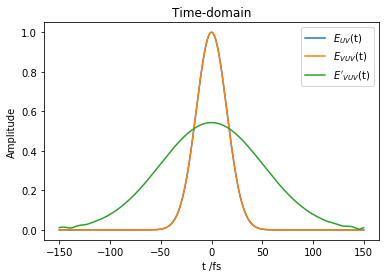

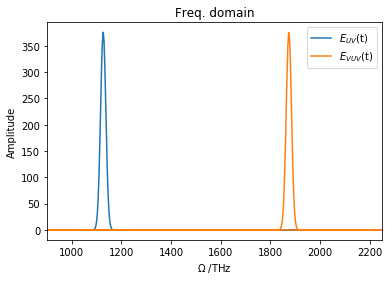

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide


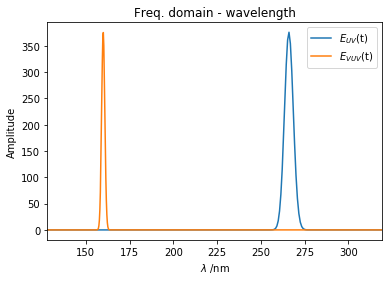

In [254]:
# Fields

# UV @ 266nm, 35fs
sig1 = 15
FWHM(sig1)
f1 = 1127*fUnit*tUnit  # Carrier freq. in relative units, = f0/tUnit in Hz. (1127THz = 266nm)
E1 = Et(1,t,sig1,w0=f1*2*np.pi)  # Full field, imaginary, w0 defined as angular freq.
E1w, f = Ew(E1,t=t*tUnit,dt=dt)

# VUV @ 160nm, 35fs bandwidth
sig2 = 15
FWHM(sig2)
f2 = 1874*fUnit*tUnit  # Carrier freq. in relative units, = f0/tUnit in Hz. (1187THz = 160nm)
E2 = Et(1,t,sig2,w0=f2*2*np.pi)  # Full field, imaginary, w0 defined as angular freq.
E2w, f = Ew(E2,t=t*tUnit,dt=dt*tUnit)

# Redefine VUV pulse - add chirp
E2w = np.abs(E2w)
A = 1.2e-13  # Approx value for x2 pulse duration
Ewq = np.abs(E2w)*np.exp(1.0j*(A*(f-(f2/tUnit)))**2)
E2tmod = np.fft.ifftshift(np.fft.ifft(Ewq))
# E2tmod = (np.fft.ifft(Ewq))

# Plot fields - time-domain
plt.figure()
plt.plot(t,np.abs(E1),t,np.abs(E2),t,np.abs(E2tmod))
plt.xlabel('t /fs')
plt.ylabel('Amplitude')
plt.title('Time-domain')
plt.legend(('$E_{UV}$(t)','$E_{VUV}$(t)','$E\'_{VUV}$(t)'))
plt.show()

# Plot fields - freq-domain
plt.figure
plt.plot(f/fUnit,np.abs(E1w),f/fUnit,np.abs(E2w))
plt.xlim((0.8*(f1/tUnit)/fUnit,1.2*(f2/tUnit)/fUnit))
plt.xlabel('$\Omega$ /THz')
plt.ylabel('Amplitude')
plt.title('Freq. domain')
plt.legend(('$E_{UV}$(t)','$E_{VUV}$(t)'))
plt.show()

# Plot fields - freq-domain, wavelength units
lam = scipy_constants.c/f  # Define wavelength axis
plt.figure
plt.plot(lam/lUnit,np.abs(E1w),lam/lUnit,np.abs(E2w))
plt.xlim((0.8*(scipy_constants.c/(f2/tUnit))/lUnit,1.2*(scipy_constants.c/(f1/tUnit))/lUnit))
plt.xlabel('$\lambda$ /nm')
plt.ylabel('Amplitude')
plt.title('Freq. domain - wavelength')
plt.legend(('$E_{UV}$(t)','$E_{VUV}$(t)'))
plt.show()



## Photoelectron parameters

Photon energies:

$E_{photon} = h\nu$

Total energy, assuming a 2-photon process:

$E_{tot} = E_{1}+E_{2}$

Photoelectron kinetic energy = excess energy:

$E_{KE} = E_{tot} - IP$

Where IP is the ionization potential of the ionizing species. (For Xe, 12.1298 eV, [from NIST](https://physics.nist.gov/cgi-bin/ASD/ie.pl?spectra=H-DS+i&units=1&at_num_out=on&el_name_out=on&shells_out=on&level_out=on&e_out=0&unc_out=on&biblio=on).)

In [246]:
# Photoelectron spectrogram

# Photon energies (eV)
Ep1 = (scipy_constants.h/scipy_constants.e) * f1/tUnit
Ep2 = (scipy_constants.h/scipy_constants.e) * f2/tUnit

Etot = Ep1+Ep2

IP = 12.1298436 # For Xenon, from NIST

Eke = Etot - IP

print(f'Central Eke feature = {Eke:.3f} eV')

# Photoelectron energy axis definition
Eaxis = ((scipy_constants.h/scipy_constants.e) * f)-IP

Central Eke feature = 0.281 eV


## Calculate Spectrogram

In [ ]:
# Spectrogram
S = frog(E2tmod,E1)

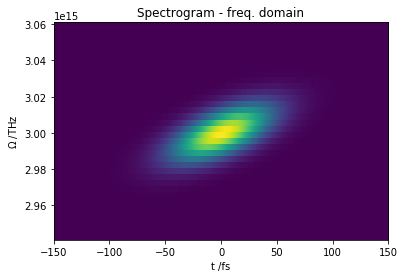

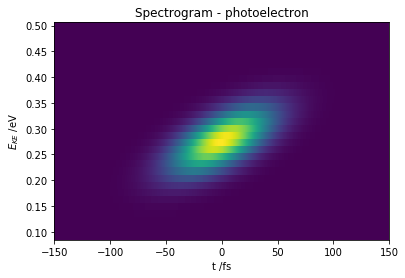

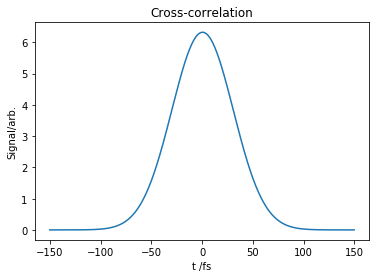

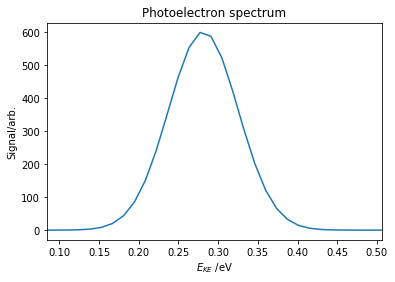

In [245]:
# Plotting

# Frequency
plt.figure()
plt.imshow(np.abs(S)**2, extent = [t[0],t[-1],f[np.int(S.shape[0]/2)-1],f[np.int(S.shape[0]/2)]], aspect='auto')
plt.ylim((0.98*((f1+f2)/tUnit),1.02*((f1+f2)/tUnit)))
plt.ylabel('$\Omega$ /THz')
plt.xlabel('t /fs')
plt.title('Spectrogram - freq. domain')
plt.show()

# Photoelectron energy
plt.figure()
plt.imshow(np.abs(S)**2, extent = [t[0],t[-1], Eaxis[np.int(S.shape[0]/2)-1], Eaxis[np.int(S.shape[0]/2)]], aspect='auto')
plt.ylim((0.3*Eke,1.8*Eke))
# plt.ylim((1,0))
# plt.gca().invert_yaxis()
plt.ylabel('$E_{KE}$ /eV')
plt.xlabel('t /fs')
plt.title('Spectrogram - photoelectron')
plt.show()

# Cross-correlation
plt.figure()
plt.plot(t,np.sum(np.abs(S)**2,axis=0))
plt.ylabel('Signal/arb.')
plt.xlabel('t /fs')
plt.title('Cross-correlation')
plt.show()

# Photoelectron spectrum 
plt.figure()
plt.plot(np.fft.fftshift(Eaxis),np.sum(np.abs(S)**2,axis=1))
plt.xlim((0.3*Eke,1.8*Eke))
plt.ylabel('Signal/arb.')
plt.xlabel('$E_{KE}$ /eV')
plt.title('Photoelectron spectrum')
plt.show()